In [1]:
!pip install fbm --quiet

In [ ]:
import numpy as np
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

from fbm import FBM

np.random.seed(42)

In [ ]:
pkn = yf.Ticker("pkn.wa")

pkn_hist = pkn.history(start="2000-01-01", end="2024-03-01", interval="1d")

prices = pkn_hist['Close'].values
prices_log = np.log10(prices)

# Logarytmiczne stopy zwrotu
log_return_rates = np.diff(prices_log)

# Normalizacja
mean = np.mean(log_return_rates)
std = np.std(log_return_rates)
log_return_rates_norm = (log_return_rates - mean) / std

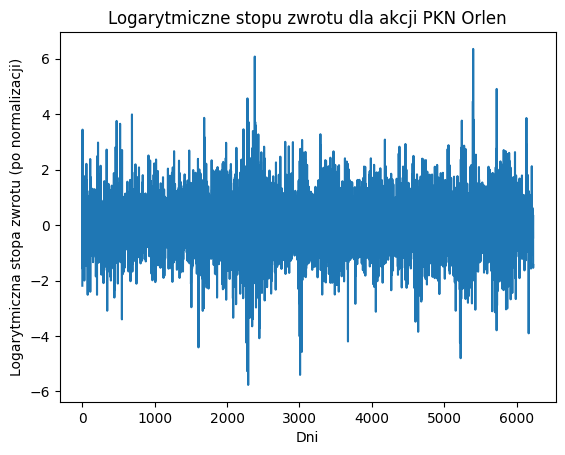

In [ ]:
# Wykres
plt.plot(log_return_rates_norm)
plt.title('Logarytmiczne stopu zwrotu dla akcji PKN Orlen')
plt.ylabel('Logarytmiczna stopa zwrotu (po normalizacji)')
plt.xlabel('Dni')
plt.show()

### Generowanie danych białego szumu

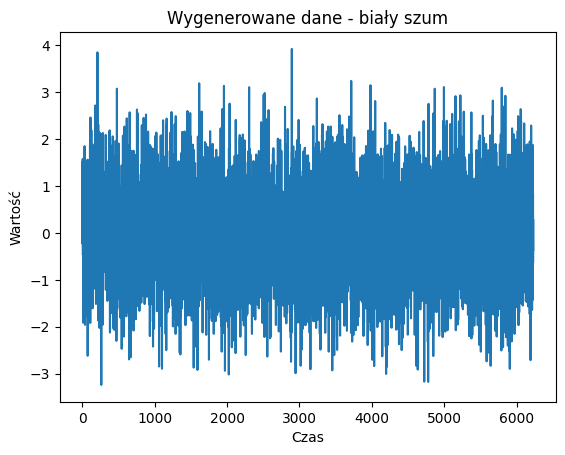

In [ ]:
# Generowanie danych o rozkładzie normalnym
white_noise = np.random.normal(0, 1, len(log_return_rates_norm))

# Wykres
plt.plot(white_noise)
plt.title('Wygenerowane dane - biały szum')
plt.ylabel('Wartość')
plt.xlabel('Czas')
plt.show()

### Generowanie danych ułamkowego ruchu Browna

In [ ]:
# Generowanie danych fbm dla wartości H 0.25 i 0.75
f_025 = FBM(len(log_return_rates), 0.25)
f_075 = FBM(len(log_return_rates), 0.75)

f_025_sample = np.diff(f_025.fbm())
f_075_sample = np.diff(f_075.fbm())

f_025_norm = (f_025_sample - np.mean(f_025_sample)) / np.std(f_025_sample)
f_075_norm = (f_075_sample - np.mean(f_075_sample)) / np.std(f_075_sample)

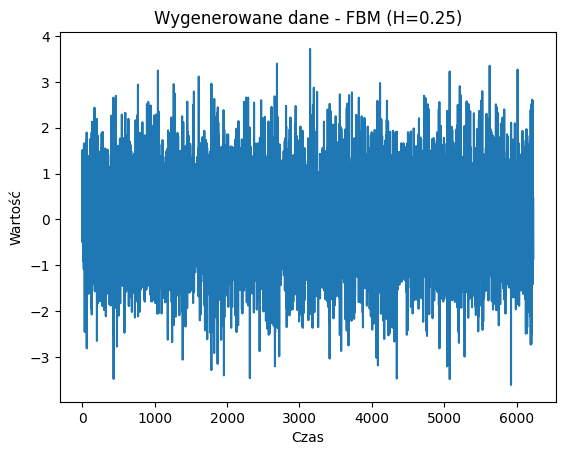

In [ ]:
# Wykres
plt.plot(f_025_norm)
plt.title('Wygenerowane dane - FBM (H=0.25)')
plt.ylabel('Wartość')
plt.xlabel('Czas')
plt.show()

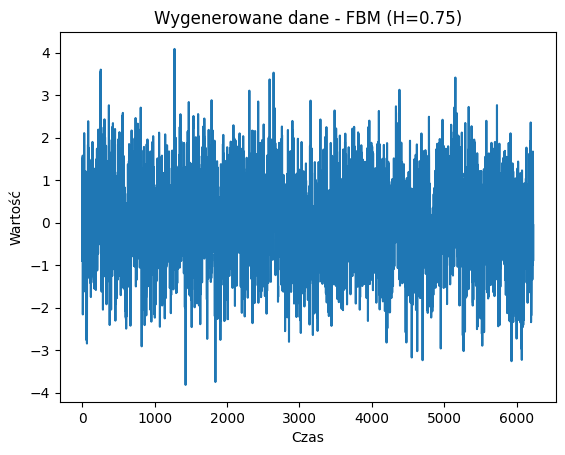

In [ ]:
# Wykres
plt.plot(f_075_norm)
plt.title('Wygenerowane dane - FBM (H=0.75)')
plt.ylabel('Wartość')
plt.xlabel('Czas')
plt.show()

### Zdefiniowanie funkcji autokorelacji

In [ ]:
def autocorrelation(signal, max_tau):
    signal = np.asarray(signal)
    sum_max = np.sum(signal ** 2)

    taus = np.arange(1, max_tau + 1)
    res = np.array([np.sum(signal[tau:] * signal[:-tau]) for tau in taus]) / sum_max

    return np.append([1], res)

### Policzenie funkcji autokorelacji

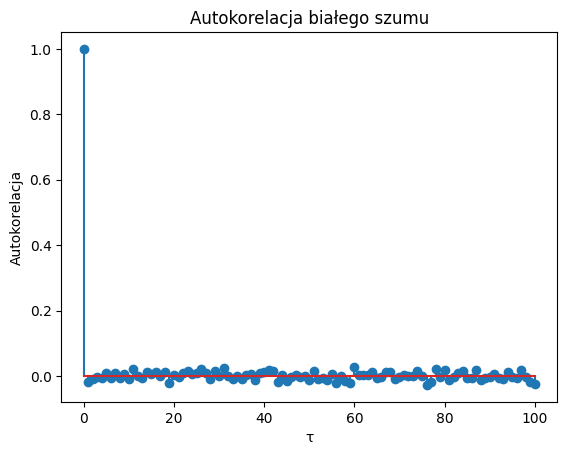

In [ ]:
plt.stem(autocorrelation(white_noise, 100))
plt.title('Autokorelacja białego szumu')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

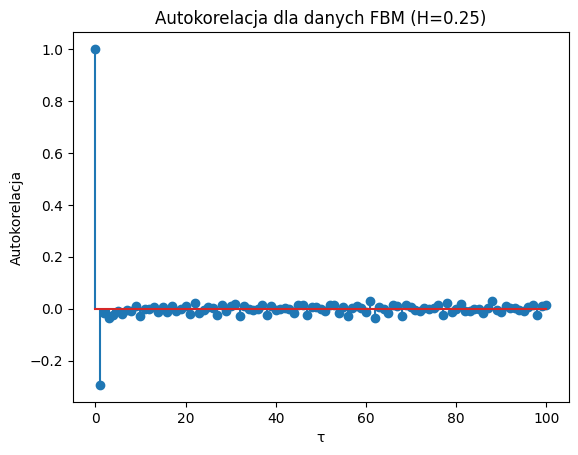

In [ ]:
plt.stem(autocorrelation(f_025_norm, 100))
plt.title('Autokorelacja dla danych FBM (H=0.25)')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

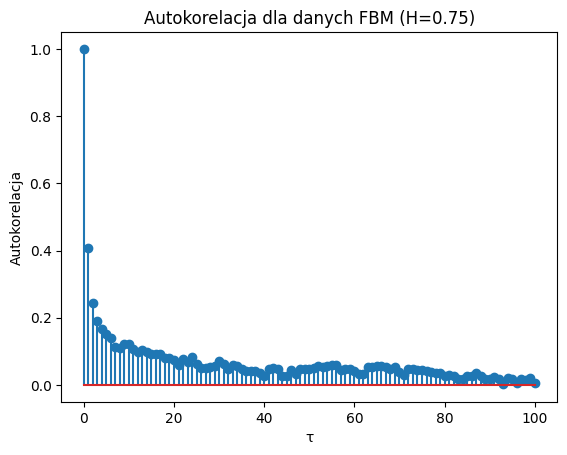

In [ ]:
plt.stem(autocorrelation(f_075_norm, 100))
plt.title('Autokorelacja dla danych FBM (H=0.75)')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

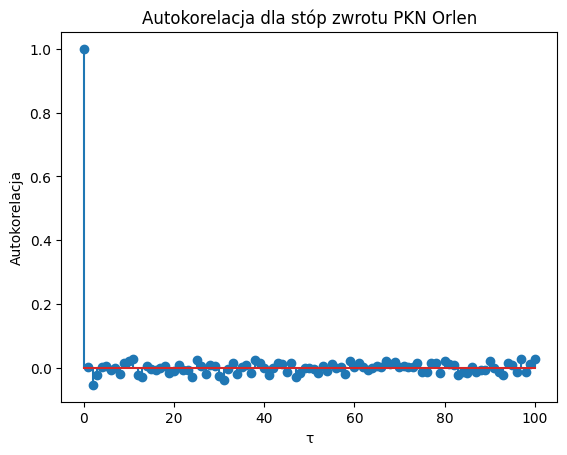

In [ ]:
plt.stem(autocorrelation(log_return_rates_norm, 100))
plt.title('Autokorelacja dla stóp zwrotu PKN Orlen')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

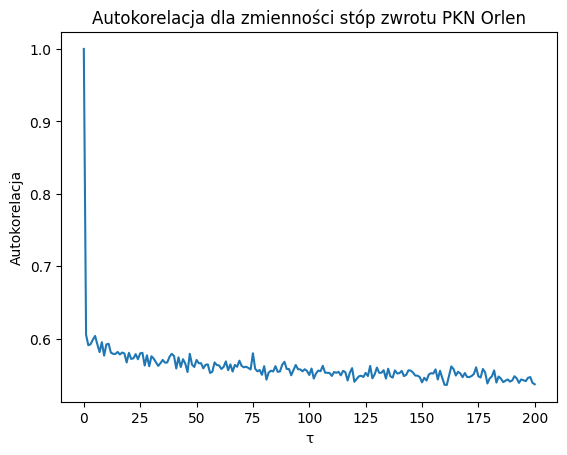

In [ ]:
plt.plot(autocorrelation(np.abs(log_return_rates_norm), 200))
plt.title('Autokorelacja dla zmienności stóp zwrotu PKN Orlen')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.show()

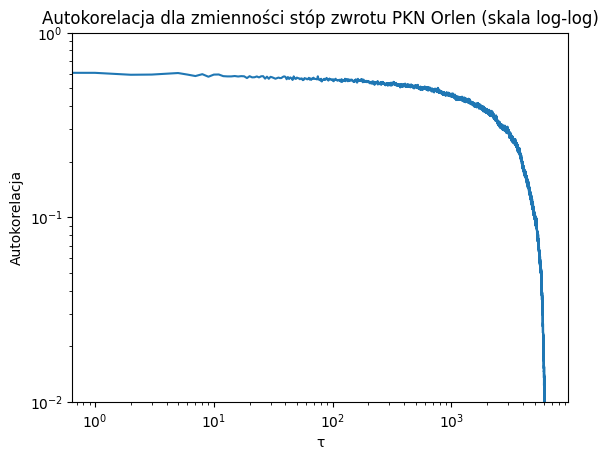

In [ ]:
plt.plot(autocorrelation(np.abs(log_return_rates_norm), len(log_return_rates_norm)-1))
plt.title('Autokorelacja dla zmienności stóp zwrotu PKN Orlen (skala log-log)')
plt.ylabel('Autokorelacja')
plt.xlabel('τ')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-2, 1])
plt.show()

### Transformata Fouriera

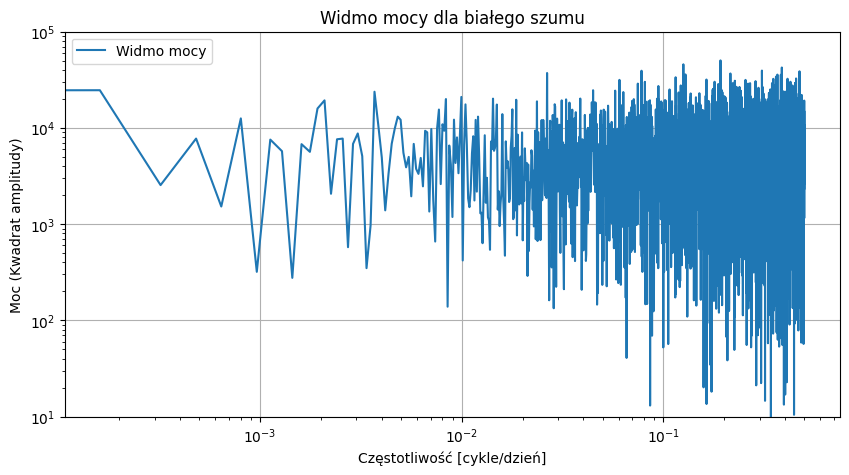

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(white_noise)
fft_frequencies = np.fft.fftfreq(len(white_noise), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla białego szumu')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.ylim([1e1, 1e5])
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

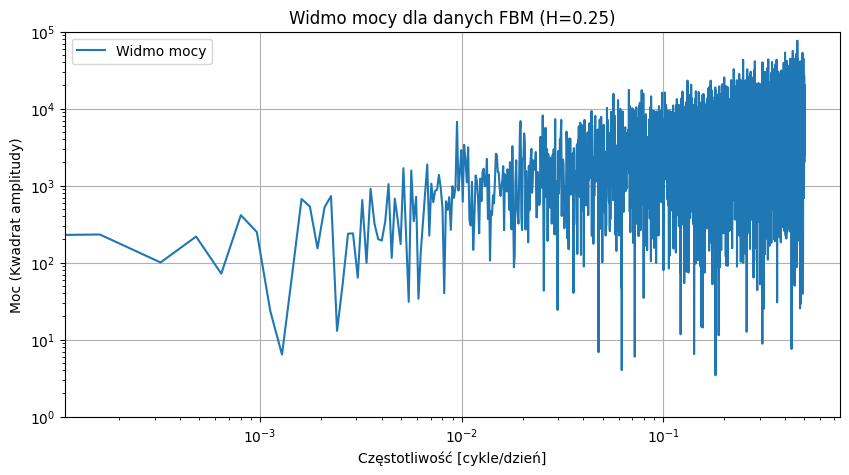

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(f_025_norm)
fft_frequencies = np.fft.fftfreq(len(f_025_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla danych FBM (H=0.25)')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.ylim([1, 1e5])
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

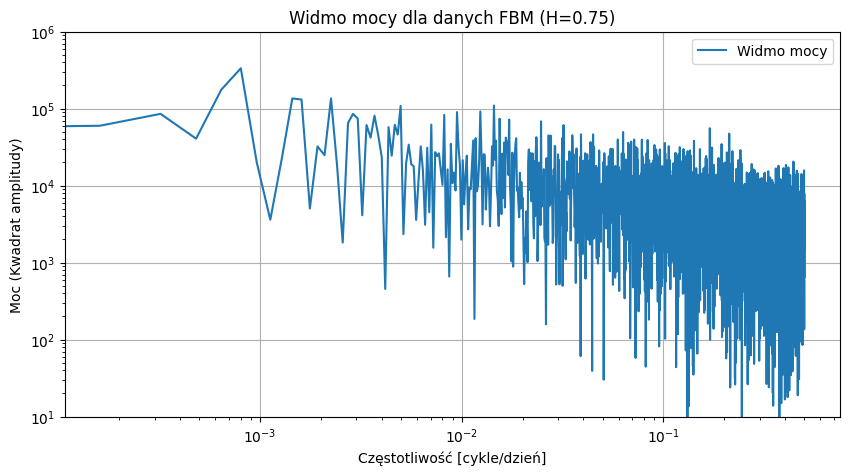

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(f_075_norm)
fft_frequencies = np.fft.fftfreq(len(f_075_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla danych FBM (H=0.75)')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.ylim([1e1, 1e6])
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

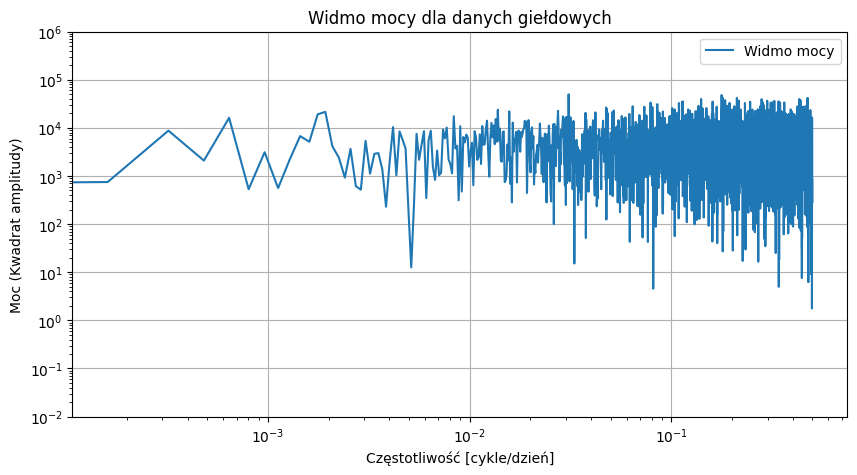

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(log_return_rates_norm)
fft_frequencies = np.fft.fftfreq(len(log_return_rates_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla danych giełdowych')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-2, 1e6])
plt.grid()
plt.legend()
plt.show()

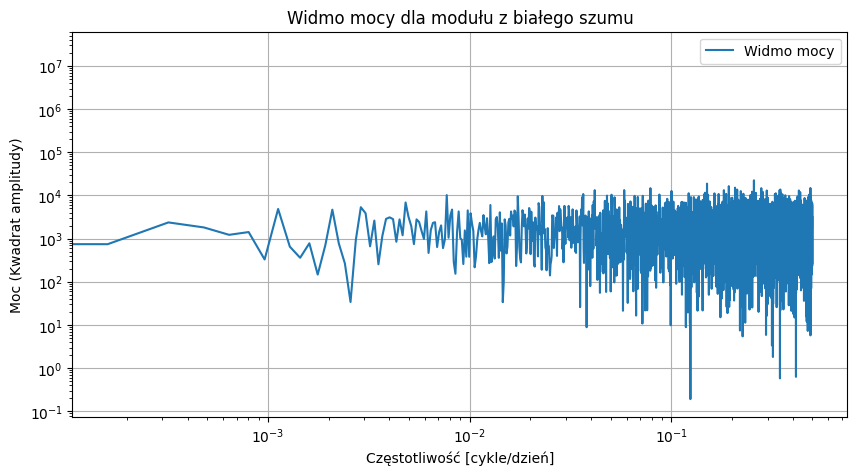

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(np.abs(white_noise))
fft_frequencies = np.fft.fftfreq(len(white_noise), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla modułu z białego szumu')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

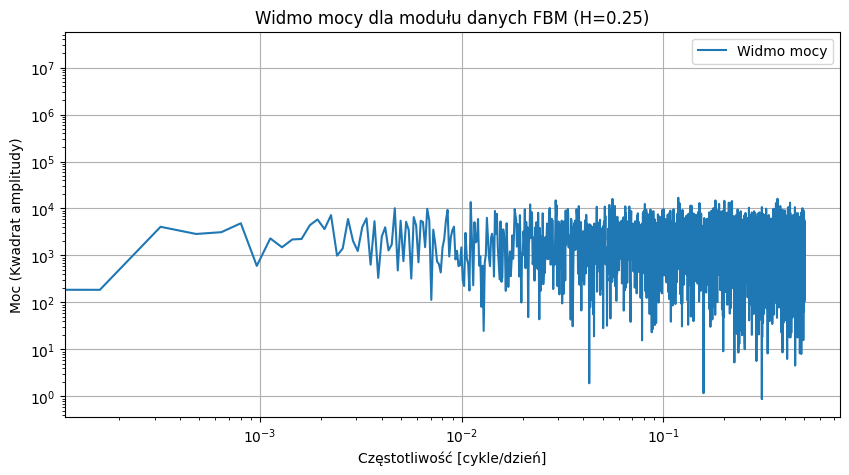

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(np.abs(f_025_norm))
fft_frequencies = np.fft.fftfreq(len(f_025_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla modułu danych FBM (H=0.25)')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

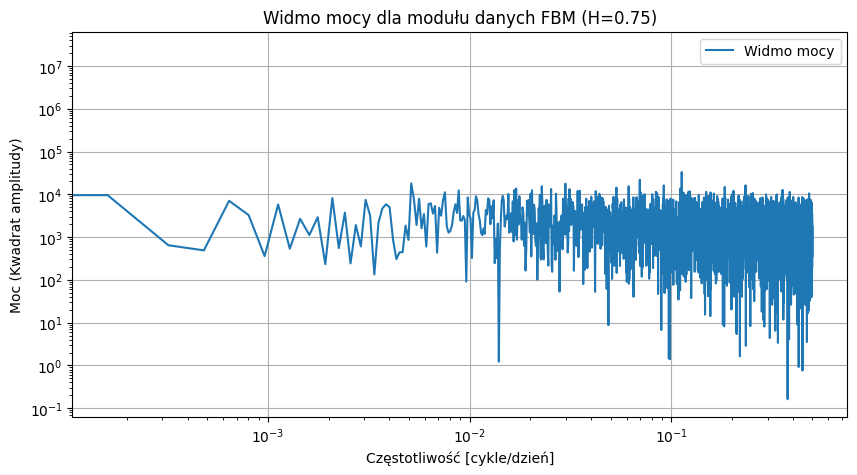

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(np.abs(f_075_norm))
fft_frequencies = np.fft.fftfreq(len(f_075_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla modułu danych FBM (H=0.75)')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

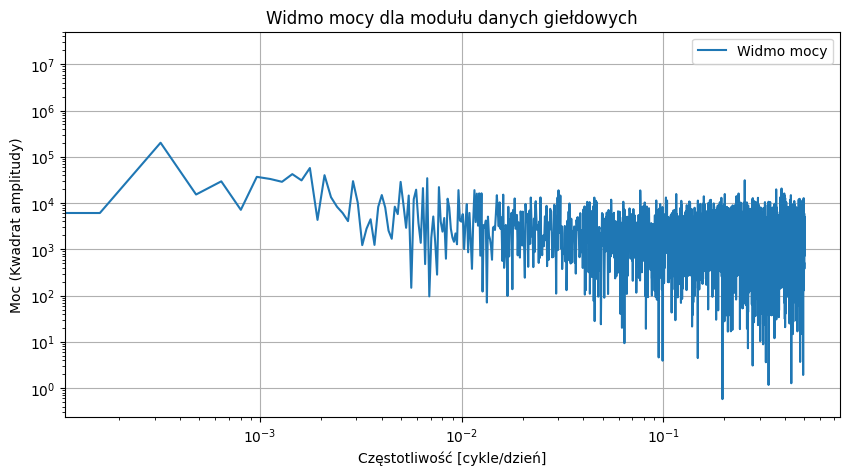

In [ ]:
# Obliczenie transformaty Fouriera
fft_white_noise = np.fft.fft(np.abs(log_return_rates_norm))
fft_frequencies = np.fft.fftfreq(len(log_return_rates_norm), d=1)

fft_frequencies = np.fft.fftshift(fft_frequencies)
fft_white_noise = np.fft.fftshift(fft_white_noise)

# Wizualizacja widma mocy
plt.figure(figsize=(10, 5))
plt.plot(fft_frequencies, np.abs(fft_white_noise)**2, label="Widmo mocy")
plt.title('Widmo mocy dla modułu danych giełdowych')
plt.ylabel('Moc (Kwadrat amplitudy)')
plt.xlabel('Częstotliwość [cykle/dzień]')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()